# Maximum Sustainable Yield
Find the optimum starting and ending time using the following restrictions:  
- Maximum MSY = 0.7
- Fishing starts at t = 2 years

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

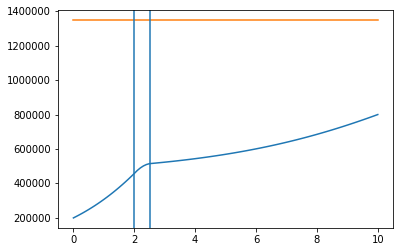

In [2]:
def steps(ramp_start, ramp_end):

    total_harvest = 0
    is_extinct = False
    
    end_time = 10. # years
    h = 0.1 # years
    num_steps = int(end_time / h)
    times = h * np.array(range(num_steps + 1))
    
    maximum_growth_rate = 0.5 # 1 / year
    carrying_capacity = 2e6 # tons
    maximum_harvest_rate = 0.7 * 2.5e5 # tons / year

    fish = np.zeros(num_steps + 1) # tons
    fish[0] = 2e5

    for step in range(num_steps):
        time = h * step # years
        harvest_factor = 0.0
        # If time > ramp_end, harvest factor has reached its maximum. Harvest rate equals its maximum
        if time > ramp_end:
            harvest_factor = 1.0
        # If time > ramp_start, during this time the harvest rate increases. 
        elif time > ramp_start:
            harvest_factor = (time - ramp_start) / (ramp_end - ramp_start)    
        # When time < ramp_start, harvesting has yet to begin. Fish growth continues unimpeded. 
        harvest_rate = harvest_factor * maximum_harvest_rate
        if is_extinct:
            current_harvest = 0
            fish_next_step = 0.
        else:
            current_harvest = h * harvest_rate
            fish_next_step = fish[step] + h * (maximum_growth_rate * (1. - fish[step]  / carrying_capacity) * fish[step] - harvest_rate)
            if fish_next_step <= 0.:
                is_extinct = True
                current_harvest = fish[step]
                fish_next_step = 0.
        fish[step + 1] = fish_next_step
        total_harvest += current_harvest

    return fish, times, total_harvest
result, time, total_harvest_ = steps(2.0, 2.5)
plt.plot(time, result)
plt.plot(time, [total_harvest_ for _ in time])
plt.axvline(x=2.0)
plt.axvline(x=2.5)
plt.show()


In [3]:
def total_harvest():
    start_time = 2. # years

    results = []

    stepsize = 0.5

    for ramp_start in np.arange(2., 10.01, stepsize): # 10.01 to prevent issues with roundoff errors
        # ramp_end may not equal ramp_start
        min_ramp_end = ramp_start + stepsize
        for ramp_end in np.arange(min_ramp_end, 10.01, stepsize): # 10.01 to prevent issues with roundoff errors
            _, _, total_harvest = steps(ramp_start, ramp_end)
            results.append([ramp_start, ramp_end, total_harvest])

    return results


[2.0, 2.5, 1347500.0]


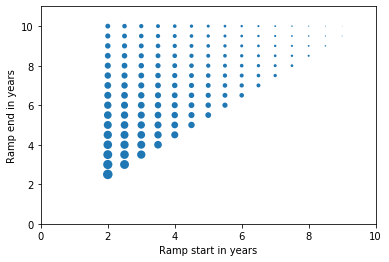

In [4]:

results = total_harvest()


def plot_me():
    # This adjusts the size of the dots to compare them easily. 
    plt.scatter([r[0] for r in results], [r[1] for r in results], [5e-11 * r[2] ** 2 for r in results], edgecolor = 'none')
    axes = plt.gca()
    axes.set_ylim(0, 11)
    axes.set_xlim(0, 10)
    axes.set_xlabel('Ramp start in years')
    axes.set_ylabel('Ramp end in years')
    plt.show()
print(max(results, key=lambda x : x[2]))

plot_me()